In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = 9, 6
import sys,os
sys.path.append('..')
import EGS5Simulations
from numpy import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /Users/sfegan/Google\ Drive/Code/Projects/Simulations/EGS5

/Users/sfegan/Google Drive/Code/Projects/Simulations/EGS5


In [3]:
atm = EGS5Simulations.LayeredAtmosphere('Parameters/atmprof6.dat')
ztop   = atm.topOfAtmosphere()
z0     = 0
nlayer = 100
bfield = None
nmedia = 1
emax   = 10000000
zn     = 0.0
w0     = cos(zn/180.0*pi)
res    = 0.02
fov    = 5.0
scopes = [ [ 60, 60, 12], [-60, 60, 12], [ 60,-60, 12], [-60,-60, 12], [  0,  0, 28] ];
scopes = [ ]
for i in range(0,5):
    scopes.append([i*60/sqrt(2),i*60/sqrt(2),12])

In [4]:
base_rng = EGS5Simulations.EGS5RanluxSimpleRNG.instance()
pd_rng = EGS5Simulations.PredefinedDeviateSimpleRNG(base_rng);
pd_rng.setPD(0,0.5);

In [5]:
det = EGS5Simulations.EGS5SimpleIACTArray(atm, nlayer, emax, bfield, z0, ztop, nmedia)
layers = EGS5Simulations.VecLayer()
det.getLayers(layers);
eff = EGS5Simulations.TelescopeEfficiency()
eff.scaleEffFromFile('Parameters/corsika_mirreff.dat')
eff.scaleEffFromFile('Parameters/corsika_quanteff.dat')
atmabs = EGS5Simulations.AtmosphericAbsorption('Parameters/corsika_atmabs.dat')
actyield = atmabs.integrateYield(z0, w0, eff)
for iscope in scopes:
    s = EGS5Simulations.EGS5ACTArrayImagingScope()
    s.x.set(iscope[0]*100, iscope[1]*100, z0)
    s.r   = iscope[2]*100 * 0.5
    s.res = res
    s.fov = fov
    s.setZnAz(zn/180.0*pi,0)
    s._yield = actyield
    det.addScope(s);

In [6]:
egs5 = EGS5Simulations.EGS5System.instance(det,pd_rng)
egs5.initializeEGS5()

### Mean images

In [7]:
d=0
pd_rng.setPD(0,0.5);
det.clearImages()
for i in range(0,50):
    pd_rng.resetSession()
    egs5.shower(100000,(ztop-z0)*tan(zn/180.0*pi)+d*100.0,0,ztop,\
                sin(zn/180.0*pi),0,-cos(zn/180.0*pi),layers.size()+1,0)

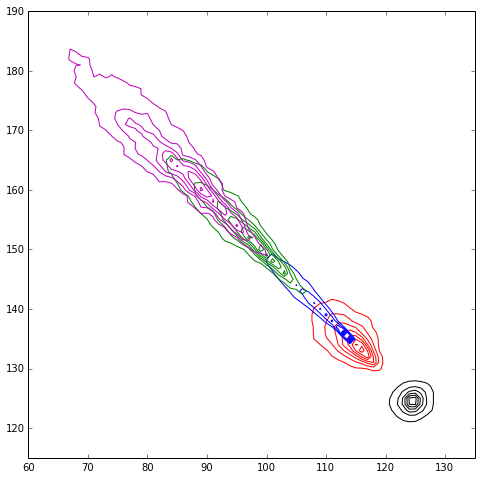

In [25]:
figure(figsize=(8,8))
hold('off')
C=['k','r','b','g','m']
for iscope in range(0,len(scopes)):
    image = det.image(iscope)
    nx = image.nXBins()
    ny = image.nYBins()
    pimage = zeros(shape=(nx,ny))
    for ix in range(0,nx):
        for iy in range(0,ny):
            pimage[ix,iy] = image.count(ix,iy)

    contour(pimage,colors=C[iscope])
    axis([60,135,115,190])
    hold('on')

### Example images with fixed first-interaction depth

360.571687936
407.629010298
352.493450237
331.745136035
383.05269376
358.60484342
396.695211296
331.494635707
336.049024141
361.936718113
345.205125664
399.557741202
357.576799282
402.759996291
405.697850315
409.430771444


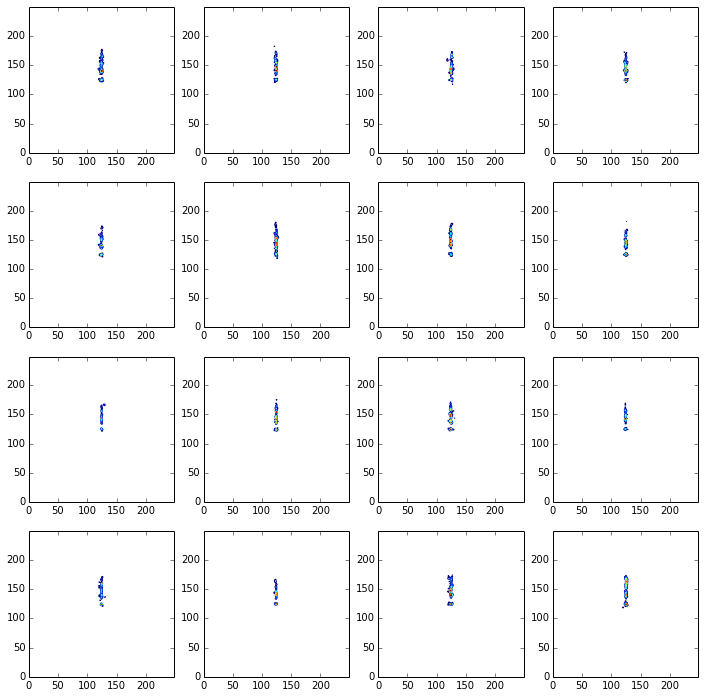

In [11]:
d=0
figure(figsize=(12,12)) 
pd_rng.setPD(0,0.5);
for i in range(0,16):
    det.clearImages()
    pd_rng.resetSession()
    egs5.shower(100000,(ztop-z0)*tan(zn/180.0*pi)+d*100.0,0,ztop,\
                sin(zn/180.0*pi),0,-cos(zn/180.0*pi),layers.size()+1,0)
    for iscope in range(0,len(scopes)):
        image = det.image(iscope)
        nx = image.nXBins()
        ny = image.nYBins()
        if iscope==0:        
            pimage = zeros(shape=(nx,ny))
        for ix in range(0,nx):
            for iy in range(0,ny):
                pimage[ix,iy] += image.count(ix,iy)
    subplot(4,4,i+1)
    hold('off')
    contour(pimage)
#    axis([80,170,70,160])
    print sum(sum(pimage))

### Distance from center of array

In [9]:
figure(figsize=(12,8)) 
pd_rng.setPD(0,0.5);
for id in range(0,6):
    d = id*60
    det.clearImages()
    for i in range(0,200):
        pd_rng.resetSession()
        egs5.shower(100000,(ztop-z0)*tan(zn/180.0*pi)+d*100.0,0,\
                    ztop,sin(zn/180.0*pi),0,-cos(zn/180.0*pi),layers.size()+1,0)
    for iscope in range(0,len(scopes)):
        image = det.image(iscope)
        nx = image.nXBins()
        ny = image.nYBins()
        if iscope==0:        
            pimage = zeros(shape=(nx,ny))
        for ix in range(0,nx):
            for iy in range(0,ny):
                pimage[ix,iy] += image.count(ix,iy)
    subplot(2,3,id+1)
    contour(pimage)

KeyboardInterrupt: 

### Depth of first interaction

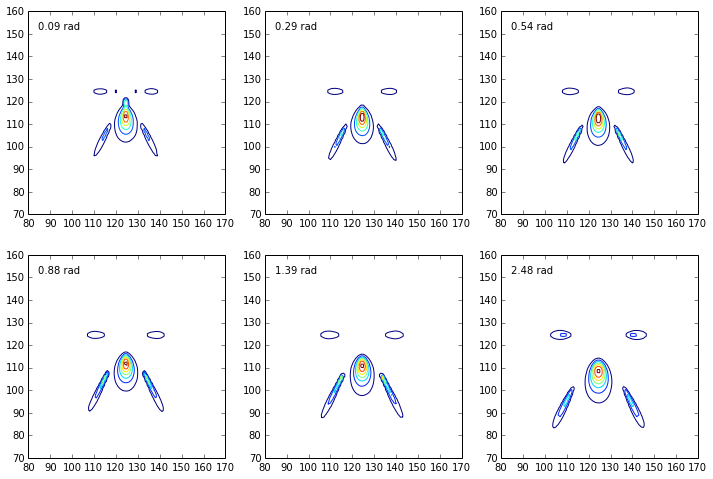

In [32]:
d=60
nsim=1000
figure(figsize=(12,8)) 
for ifrac in range(0,6):
    frac = 1.0-(ifrac+0.5)/6.0
    pd_rng.addPD(0,frac);
    det.clearImages()
    for i in range(0,nsim):
        pd_rng.resetSession()
        egs5.shower(100000,(ztop-z0)*tan(zn/180.0*pi)+d*100.0,0,\
                    ztop,sin(zn/180.0*pi),0,-cos(zn/180.0*pi),layers.size()+1,0)
    for iscope in range(0,len(scopes)):
        image = det.image(iscope)
        nx = image.nXBins()
        ny = image.nYBins()
        if iscope==0:
            pimage = zeros(shape=(nx,ny))
            simage = zeros(shape=(len(scopes),nx,ny))
        for ix in range(0,nx):
            for iy in range(0,ny):
                pimage[ix,iy] += image.count(ix,iy)
                simage[iscope,ix,iy] = image.count(ix,iy)
    subplot(2,3,ifrac+1)
    contour(pimage)
    text(0.05,0.95,'%.2f rad'%(-log(frac)),verticalalignment='top',transform=gca().transAxes)
    axis([80,170,70,160])
pd_rng.addPD(0,0.5);
numpy.savez('Notebooks/act_image_doi.npz', d=d, scopes=scopes, nsim=nsim, pimage=pimage, simage=simage)

2793.1760035513962

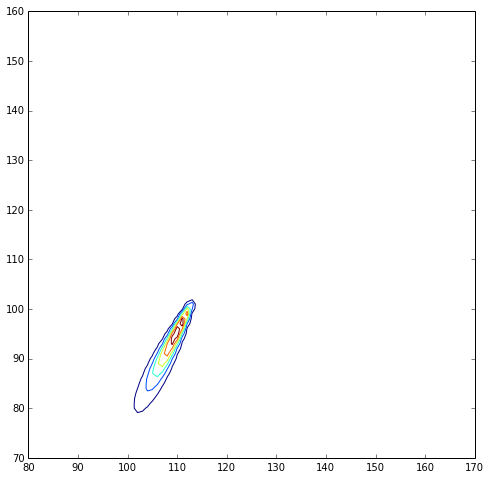

In [64]:
figure(figsize=(8,8))
x=simage[1,:,:]
contour(x)
axis([80,170,70,160]);
numpy.max(x)